#  **Qatar World Cup 2022 Prediction** 
‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎  ‎‏‏‎ ‎‏‏  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‏‏‎ ‎‏‏‎ SVM‏‏‎ ‎‏‏‎ model   ‎‏‏‎By Andeep Singh‎‏‏‎ ‎‏‏‎‎‏‏‎ ‎‏‏‎ ‎‏‏‎

‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎  ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ ‎‏‏‎ 

### Imports

In [ ]:
#Imports

from sklearn import preprocessing,impute, metrics
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split

# Importing the SVM model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics





In [ ]:
#Mounting google drive so that we can easily save / backup the file and retreive datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Football Data Dataset

In [ ]:
#Loading the historical football results dataset
df_results = pd.read_csv('/content/drive/MyDrive/data_sets/results.csv')

In [ ]:
#Viewing the data to understand what it contains
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
df_results.isnull().count()

date          44060
home_team     44060
away_team     44060
home_score    44060
away_score    44060
tournament    44060
city          44060
country       44060
neutral       44060
dtype: int64

In [ ]:
#Checking Data Types
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44060 non-null  object 
 1   home_team   44060 non-null  object 
 2   away_team   44060 non-null  object 
 3   home_score  44059 non-null  float64
 4   away_score  44059 non-null  float64
 5   tournament  44060 non-null  object 
 6   city        44060 non-null  object 
 7   country     44060 non-null  object 
 8   neutral     44060 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


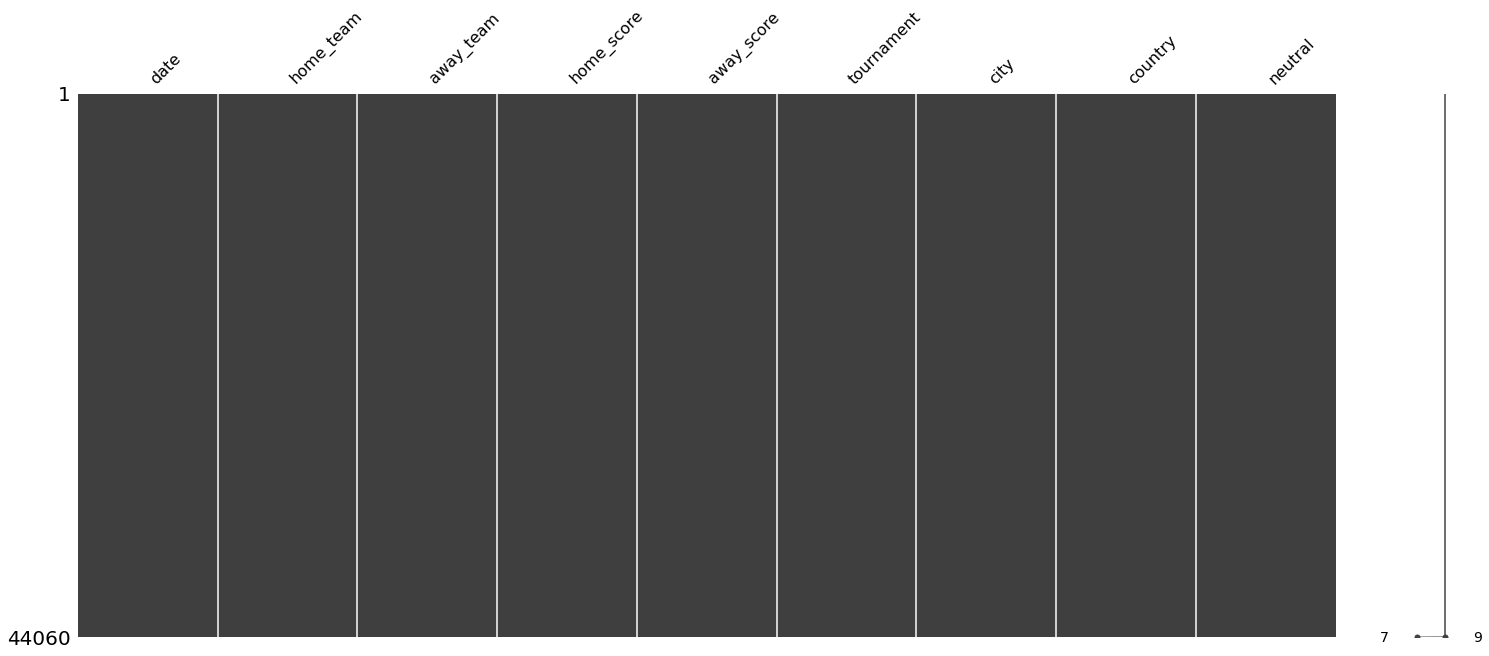

In [ ]:
msno.matrix(df_results)

**Cleaning Data**

In [ ]:

# Imputing the missing data
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
def impute_attribute(df, column, imputer=imputer):
  imputer = imputer.fit(df_results[[column]])
  return imputer.transform(df[[column]]), imputer


In [ ]:
# Imputing the home score and away score
df_results['home_score'], ca_imputer = impute_attribute(df_results,'home_score')
df_results['away_score'], ca_imputer = impute_attribute(df_results,'away_score')
df_results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
# Checking for null values after imputation
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44060 entries, 0 to 44059
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44060 non-null  object 
 1   home_team   44060 non-null  object 
 2   away_team   44060 non-null  object 
 3   home_score  44060 non-null  float64
 4   away_score  44060 non-null  float64
 5   tournament  44060 non-null  object 
 6   city        44060 non-null  object 
 7   country     44060 non-null  object 
 8   neutral     44060 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


([<matplotlib.axis.XTick at 0x7f4be73e1a60>,
 [Text(0, 0, 'Home Score'), Text(0, 0, 'Away Score')])

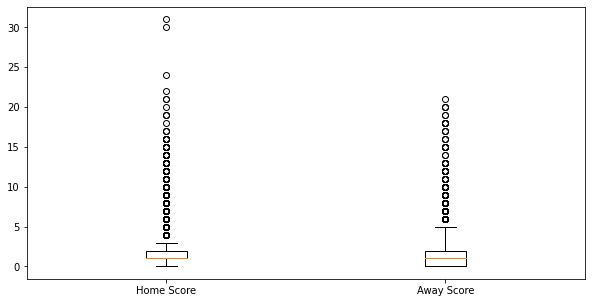

In [ ]:
#Finding outliers in the numerical data columns
fig = plt.figure(figsize =(10, 5))
plt.boxplot([df_results["home_score"],df_results["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

([<matplotlib.axis.XTick at 0x7f4be4b1b2b0>,
 [Text(0, 0, 'Home Score'), Text(0, 0, 'Away Score')])

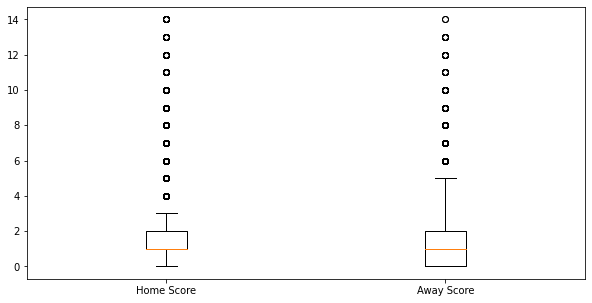

In [ ]:

#remove outlier,It will make our Machine Learning model more accurate
#Asume maximum goals that one team can score is 15
higher_home = 15
higher_away = 15
df=df_results[(df_results["home_score"]<higher_home) & (df_results["away_score"]<higher_away)]
df.head(5)

#Dataset after removing outliers
#finding outliers in the numerical data columns
fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

In [ ]:
# Correcting team names
df_results["home_team"] = df_results["home_team"].str.replace("South Korea", "Korea Republic")
df_results["away_team"] = df_results["away_team"].str.replace("South Korea", "Korea Republic")
df_results




,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.000000,0.000000,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.000000,2.000000,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.000000,1.000000,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.000000,2.000000,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.000000,0.000000,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44055,2022-09-27,Norway,Serbia,0.000000,2.000000,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.000000,1.000000,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.000000,1.000000,UEFA Nations League,Pristina,Kosovo,False
44058,2022-09-27,Greece,Northern Ireland,3.000000,1.000000,UEFA Nations League,Athens,Greece,False


In [ ]:
#Creating a subnet of df_results
df_subnet = df_results[(df_results['home_team'] == 'England') | (df_results['away_team'] == 'England')]
#assigning all the rows to england
england = df_subnet.iloc[:]
england.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
#Creating a new column within the dataframe for the macth year
#Using matches within the last 50 years to improve accuracy

# intializing a list named year
year = []
# Iterating over the date column of the england df, then append the date to year
for row in england['date']:
    year.append(int(row[:4]))
england ['match_year']= year
# Getting all the columns from the england dataframe, only selecting those where the date is above or eqal to 1972
england_1972 = england[england.match_year >= 1972]
england_1972.count()

date          578
home_team     578
away_team     578
home_score    578
away_score    578
tournament    578
city          578
country       578
neutral       578
match_year    578
dtype: int64

In [ ]:
# new column shows the winner of each match 
# Initalizing an empty list 'winner'.
winner = []
# iterating over the rows of the 'home_team' from results df
for i in range (len(df_results['home_team'])):
  # if 'home_score' row is greater than the away score, home team is appened to winner
    if df_results ['home_score'][i] > df_results['away_score'][i]:
        winner.append(df_results['home_team'][i])
        # if the 'away_score' row is greater than the home score then away team is appened to winner
    elif df_results['home_score'][i] < df_results ['away_score'][i]:
        winner.append(df_results['away_team'][i])
    else:
      # else the game ends in a draw.
        winner.append('Draw')
df_results['winning_team'] = winner

#Adding goal difference column
df_results['goal_difference'] = np.absolute(df_results['home_score'] - df_results['away_score'])

#Showing the updated df
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


In [ ]:
#Creating a new df containing the countries who are playig in the 2022 world cup 
df_worldcup_teams = ['Qatar', ' Ecuador', 'Senegal', 'Netherlands', 
            'England', 'Iran', 'USA', 'Wales', 
            'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 
            'France', 'Australia', 'Denmark', 'Tunisia', 
            'Spain', 'Costa Rica', 'Germany', 'Japan', 
            'Belgium', 'Canada', 'Morocco', 'Croatia', 
            'Brazil', 'Serbia', 'Switzerland', 'Cameroon', 
            'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

#Concat the data from df_results to df_worldcup_teams
df_home_teams = df_results[df_results['home_team'].isin(df_worldcup_teams)]#Get home teams of the teams that are playing for qatar 2022
df_away_teams = df_results[df_results['away_team'].isin(df_worldcup_teams)]#Get away teams of the teams that are playing for qatar 2022
df_teams = pd.concat((df_home_teams, df_away_teams))#Combines both teams and creates a new dataframe with the information on the countrues playing this year

#Dropping duplicates 
df_teams.drop_duplicates()

#Count - count the number of records within the columns
df_teams.count()

date               21482
home_team          21482
away_team          21482
home_score         21482
away_score         21482
tournament         21482
city               21482
country            21482
neutral            21482
winning_team       21482
goal_difference    21482
dtype: int64

In [ ]:
#Show the updated df_teams
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0


In [ ]:
# empty list that will store the years of each match
year = []
#iterates through the date of df_teams
for row in df_teams['date']:
    year.append(int(row[:4]))
    #column match year is creating, values are set to the 'year' list.
df_teams['match_year'] = year
# new df created filtering 'df_teams' to include rows that are only equal or greater than 2000
df_teams_1972 = df_teams[df_teams.match_year >= 2000]

#Showing df_teams_2000
df_teams_1972.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
8194,1972-01-08,Qatar,Yemen DPR,1.0,2.0,Palestine Cup,Baghdad,Iraq,True,Yemen DPR,1.0,1972
8196,1972-01-09,Senegal,Congo,0.0,2.0,Friendly,Dakar,Senegal,False,Congo,2.0,1972
8201,1972-01-12,Spain,Hungary,1.0,0.0,Friendly,Madrid,Spain,False,Spain,1.0,1972
8207,1972-01-27,Mexico,Chile,2.0,0.0,Friendly,Guadalajara,Mexico,False,Mexico,2.0,1972
8212,1972-02-13,Cameroon,Nigeria,1.0,2.0,Friendly,Douala,Cameroon,False,Nigeria,1.0,1972


In [ ]:
#Columns that we do not need are dropped
df_teams_1972 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral', 'goal_difference', 'match_year'], axis=1)
df_teams_1972.head()

,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Draw
6,England,Scotland,Scotland
7,Wales,Scotland,Scotland
10,England,Wales,England


In [ ]:
# Building the model and changing the values of the winning_team column to integers
# "2" if the home team has won
# "1" if the match was a draw
# "0" if the away team has won

df_teams_1972 = df_teams_1972.reset_index(drop=True)
df_teams_1972.loc[df_teams_1972.winning_team == df_teams_1972.home_team,'winning_team']=2
df_teams_1972.loc[df_teams_1972.winning_team == 'Draw', 'winning_team']=1
df_teams_1972.loc[df_teams_1972.winning_team == df_teams_1972.away_team, 'winning_team']=0

#Showing the df with the new column
df_teams_1972.head()

,home_team,away_team,winning_team
0,England,Scotland,2
1,England,Scotland,1
2,England,Scotland,0
3,Wales,Scotland,0
4,England,Wales,2


### FIFA Rankings Dataset

In [ ]:
#Importing FIFA's rankings dataset 
df_rankings = pd.read_csv('/content/drive/MyDrive/data_sets/fifa_ranking-2022-10-06.csv')

#List for storing the group stage games used later on
predictiondf = []

Reading Dataset

In [ ]:
#Showing the FIFA Rankings dataset to get an understanding of what's included
df_rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.00,0.00,0,UEFA,1992-12-31
1,96,Syria,SYR,11.00,0.00,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,1992-12-31
3,99,Latvia,LVA,10.00,0.00,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.00,0.00,0,CAF,1992-12-31
...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06


Making Changes by Keeping Useful Data

In [ ]:
#Dropping rankings before 2022 as I only want to use the most recent rankings
#Acording to the offical FIFA site tha last rankings where recorded on "2022-10-06"
df_rankings_2022 = df_rankings[df_rankings.rank_date >= "2022-10-06"]

#Dropping columns that are not needed
df_rankings_2022 = df_rankings_2022.drop(['country_abrv', 'previous_points', 'rank_change', 'confederation', 'rank_date'], axis=1)

#Correct spellings to match results datasets
df_rankings_2022["country_full"] = df_rankings_2022["country_full"].str.replace("IR Iran", "Iran").str.replace("USA", "United States")

#View df_ranking and sort it by rank (ascending)
df_rankings_2022.sort_values(by=['rank'])

,rank,country_full,total_points
63809,1,Brazil,1841.30
63838,2,Belgium,1816.71
63839,3,Argentina,1773.88
63840,4,France,1759.78
63841,5,England,1728.47
...,...,...,...
63776,207,Sri Lanka,825.25
63777,208,US Virgin Islands,823.97
63778,209,British Virgin Islands,809.32
63837,210,Anguilla,790.74


### Fixtures Dataset

Reading Dataset

In [ ]:
#Loading fixtures of the world cup
df_fixtures = pd.read_csv('/content/drive/MyDrive/data_sets/fixtures.csv')

df_fixtures.head(5)

,Match Number,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,1,20/11/2022 16:00,Al Bayt Stadium,Qatar,Ecuador,Group A,0 - 2
1,3,1,21/11/2022 13:00,Khalifa International Stadium,England,Iran,Group B,6 - 2
2,2,1,21/11/2022 16:00,Al Thumama Stadium,Senegal,Netherlands,Group A,0 - 2
3,4,1,21/11/2022 19:00,Ahmad Bin Ali Stadium,USA,Wales,Group B,1 - 1
4,8,1,22/11/2022 10:00,Lusail Stadium,Argentina,Saudi Arabia,Group C,1 - 2


Making Changes For Accuracy and Prediction Set

In [ ]:
# append usa to united states
df_fixtures["Home Team"] = df_fixtures["Home Team"].str.replace("USA", "United States")
df_fixtures["Away Team"] = df_fixtures["Away Team"].str.replace("USA", "United States")

# maps home team to rank
df_fixtures.insert(1, 'first_position', df_fixtures['Home Team'].map(df_rankings_2022.set_index('country_full')['rank']))
# maps away team to rank
df_fixtures.insert(2, 'second_position', df_fixtures['Away Team'].map(df_rankings_2022.set_index('country_full')['rank']))

# slices to the group stage matches
df_fixtures = df_fixtures.iloc[:48, :]

df_fixtures.head(5)

,Match Number,first_position,second_position,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,50.0,44.0,1,20/11/2022 16:00,Al Bayt Stadium,Qatar,Ecuador,Group A,0 - 2
1,3,5.0,20.0,1,21/11/2022 13:00,Khalifa International Stadium,England,Iran,Group B,6 - 2
2,2,18.0,8.0,1,21/11/2022 16:00,Al Thumama Stadium,Senegal,Netherlands,Group A,0 - 2
3,4,16.0,19.0,1,21/11/2022 19:00,Ahmad Bin Ali Stadium,United States,Wales,Group B,1 - 1
4,8,3.0,51.0,1,22/11/2022 10:00,Lusail Stadium,Argentina,Saudi Arabia,Group C,1 - 2


In [ ]:
# iterates over the rows of 'df_fixtures' comparing the values in the 'first_postion' to the 'second_position
for index, row in df_fixtures.iterrows():
  # if the first position is less than the second postion it adds a new row to 'predictiondf'
    if row['first_position'] < row['second_position']:
        predictiondf.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
      # same thing but home and away are swapped
        predictiondf.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})
        
# new data frame using the list of dictionaries created in the loop.
predictiondf = pd.DataFrame(predictiondf)
# copy
backup_predictiondf = predictiondf

predictiondf.head()

,home_team,away_team,winning_team
0,Ecuador,Qatar,None
1,England,Iran,None
2,Netherlands,Senegal,None
3,United States,Wales,None
4,Argentina,Saudi Arabia,None


In [ ]:
# creating dummies of the home teams and away teams.
final = pd.get_dummies(df_teams_1972, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

#Seperates X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

#View top of final dataframe
final.head()


,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
final

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21477,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21478,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21479,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# convert categorical variables into numerical variables.
predictiondf = pd.get_dummies(predictiondf, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

#Add Misiing Columns to training set
missing_columns = set(final.columns) - set(predictiondf.columns)
for c in missing_columns:
    predictiondf[c] = 0
predictiondf = predictiondf[final.columns]

#Remove Winning Team Column
predictiondf = predictiondf.drop(['winning_team'], axis=1)

predictiondf.tail()

<ipython-input-30-39e767422cf7>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  predictiondf[c] = 0


,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split

In [ ]:
# creating dummies of the home teams and away teams.
final = pd.get_dummies(df_teams_1972, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

final.head()

,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Seperates X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

#View top of final dataframe
final.head()


,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Seperating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
X_train

,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andalusia,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
3774,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

3774     1
19474    1
216      2
18197    0
5291     1
        ..
11284    0
11964    0
5390     2
860      0
15795    0
Name: winning_team, Length: 12889, dtype: int64

## EDA

In [ ]:
df_teams

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0,1873
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0,1875
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0,1877
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0,1877
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0,1879
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,2022-09-27,Iran,Senegal,1.0,1.0,Friendly,Maria Enzersdorf,Austria,True,Draw,0.0,2022
44036,2022-09-27,Korea Republic,Cameroon,1.0,0.0,Friendly,Seoul,South Korea,False,Korea Republic,1.0,2022
44043,2022-09-27,Paraguay,Morocco,0.0,0.0,Friendly,Sevilla,Spain,True,Draw,0.0,2022
44050,2022-09-27,Portugal,Spain,0.0,1.0,UEFA Nations League,Braga,Portugal,False,Spain,1.0,2022


(array([0.00014896, 0.00027558, 0.00056978, 0.00143376, 0.00323992,
        0.00251746, 0.00478168, 0.00727307, 0.01088912, 0.0127288 ,
        0.01867238, 0.01746951]),
 array([1872. , 1884.5, 1897. , 1909.5, 1922. , 1934.5, 1947. , 1959.5,
        1972. , 1984.5, 1997. , 2009.5, 2022. ]),
 <a list of 12 Patch objects>)

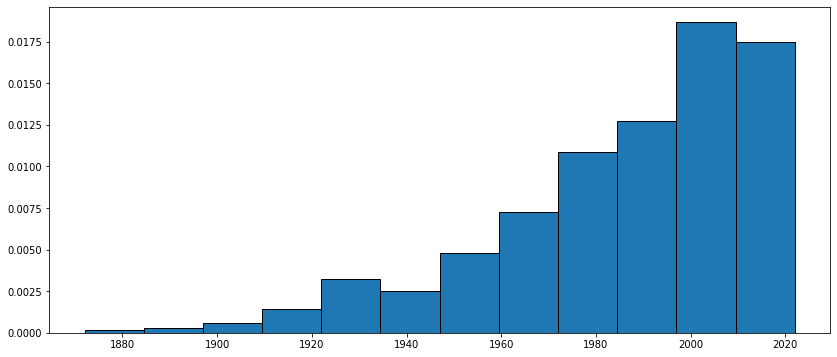

In [ ]:

#Frequency of Matches Since 1873
years = []
for date in df_teams.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")

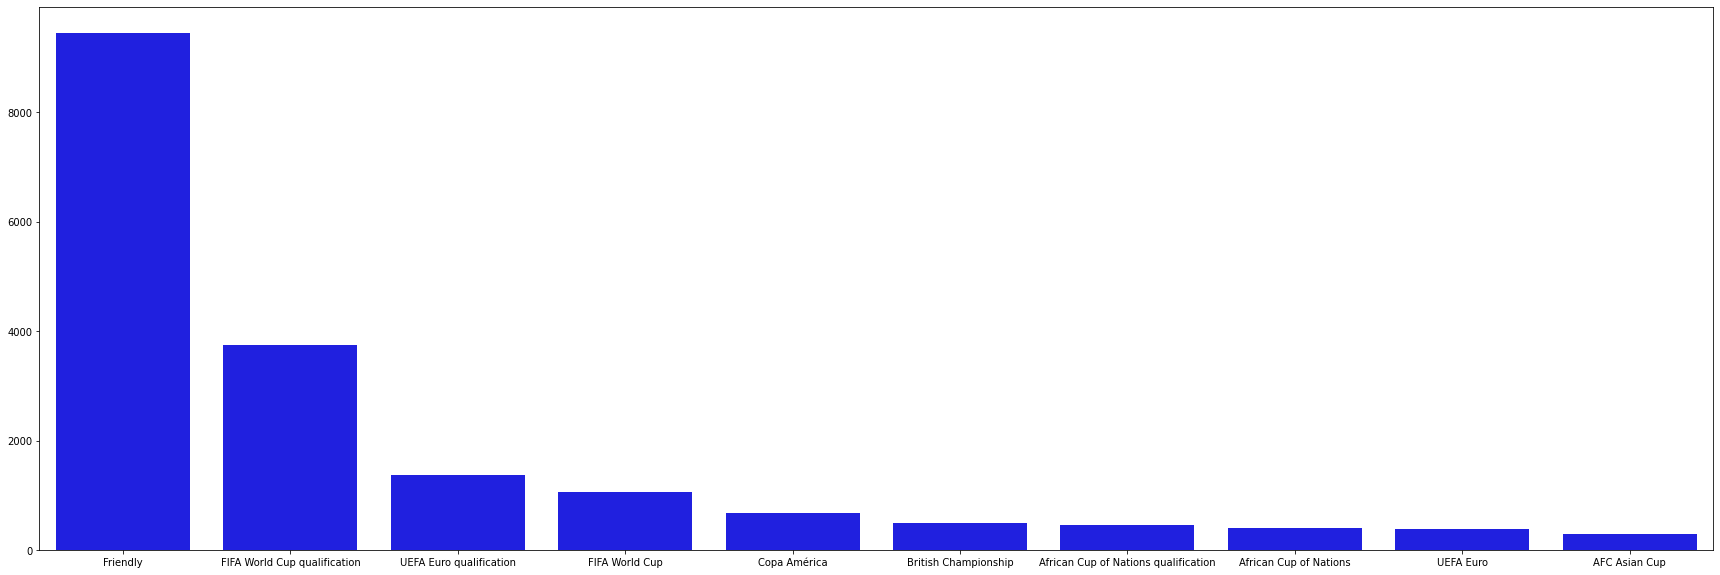

In [ ]:
#                                             Popular Tournaments
tourn = df_teams['tournament'].value_counts()
tourn = tourn[:10]
plt.figure(figsize = (30,10))
sns.barplot(x=tourn.index, y=tourn.values, color="blue")


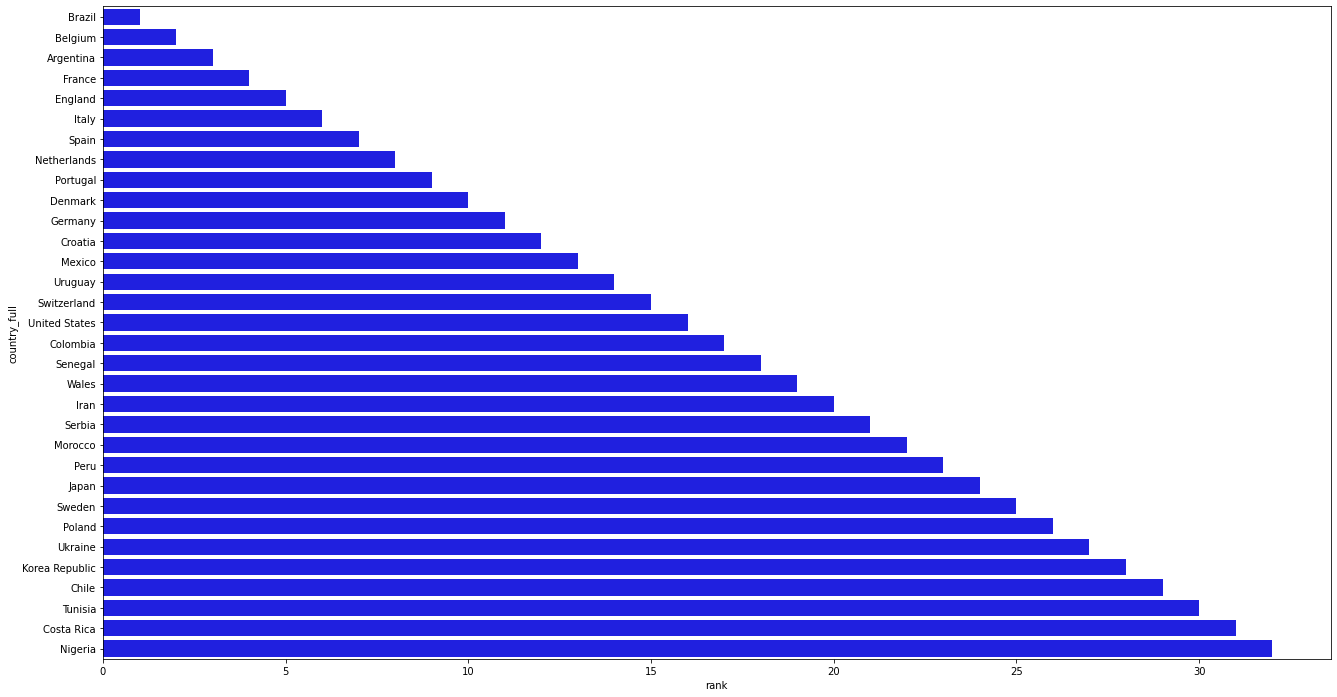

In [ ]:
#Bar Graph - Showing top ranked teams
plt.figure(figsize = (22,12)) # Size of the graph
#Sort Graph
plt_data = df_rankings_2022.sort_values(by='rank')[:32] # As there are 32 teams in the world cup
sns.barplot(y="country_full", x="rank", data=plt_data, color="blue")



In [ ]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0,1873
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0,1875
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0,1877
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0,1877
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0,1879


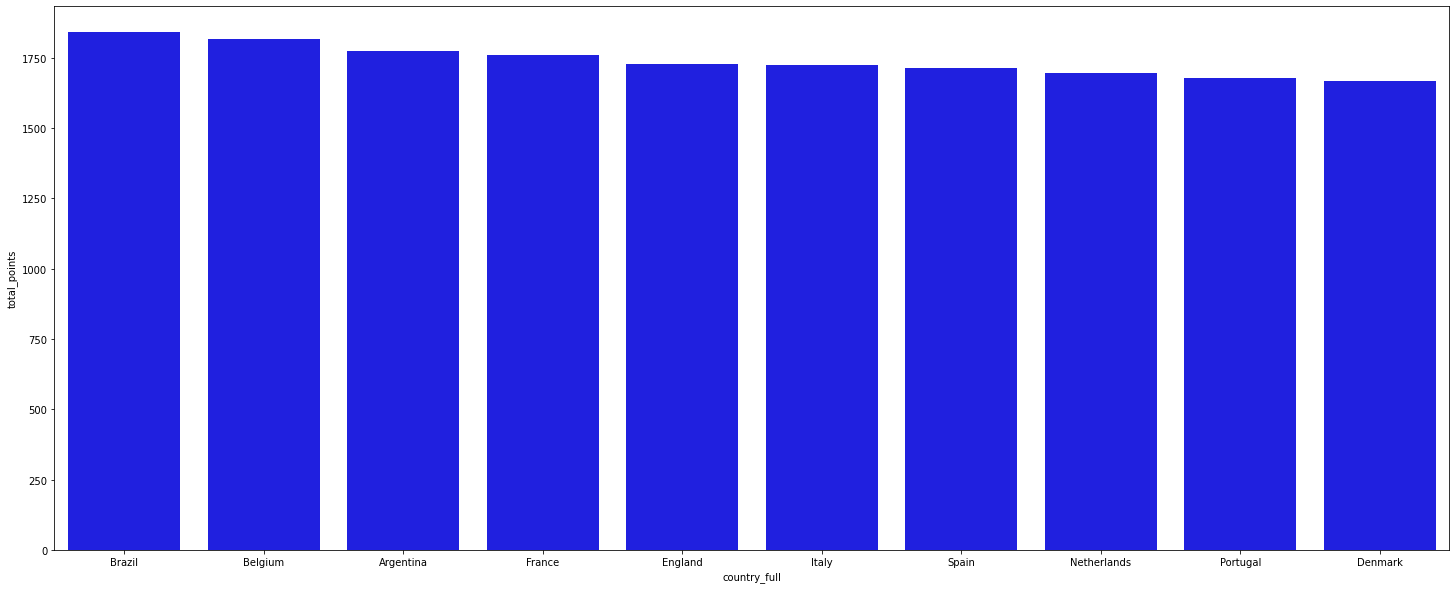

In [ ]:
#Bar Graph - Showing teams with highest points
plt.figure(figsize = (25,10))
plt_data = df_rankings_2022.sort_values(by='total_points', ascending=False)[:10]
sns.barplot(x="country_full", y="total_points", data=plt_data, color="blue")




<BarContainer object of 10 artists>

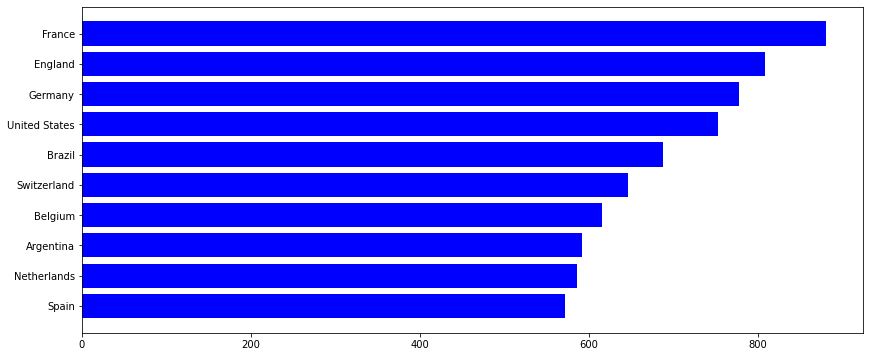

In [ ]:

#TEAMS PLAYED MOST MATCHES
mm = df_teams.country.value_counts()[:10].sort_values()
value = mm.values
label = mm.index
plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, color='blue')



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


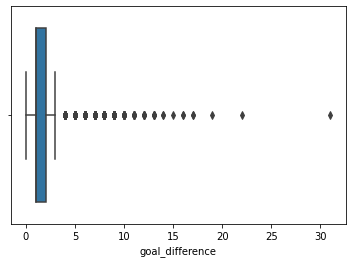

In [ ]:
sns.boxplot(df_teams['goal_difference'])

In [ ]:
df_teams.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,match_year
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0,1873
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0,1875
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0,1877
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0,1877
10,1879-01-18,England,Wales,2.0,1.0,Friendly,London,England,False,England,1.0,1879


### Creating The Support Vector Machine Model

In [ ]:
# SVM 
#clf = svm.SVC(kernel='rbf', C=1e9, gamma='scale', probability=True).fit(X_train,y_train)

In [ ]:
# SVM 
clf = svm.SVC(kernel='poly', C=50, gamma=1000, probability=True).fit(X_train, y_train)

In [ ]:
#clf = svm.SVC(kernel='linear', C=1, gamma=0.5, probability=True).fit(X_train,y_train)

### Prediction Algorithm
Creates Matches Between Competing Teams

Compares rankings and team history to get winner


In [ ]:
def prediction_algo(matches, df_fixtures, final, clf):

    #List used for data cleaning
    team_positions = []

    
    #For loop used to match the rank to the teams
    for match in matches:
        team_positions.append(df_rankings_2022.loc[df_fixtures['country_full'] == match[0],'rank'].iloc[0])
        team_positions.append(df_rankings_2022.loc[df_fixtures['country_full'] == match[1],'rank'].iloc[0])
    
    # used to make the predictions 
    predictiondf = []

    # Iterators for the while loop
    ranks = 0
    matchfix = 0

    #The "rank" is the iterator for ranks list
    #The "matchfix" is for the list of matches such as the round of 16, quaters, semis and final
    while ranks < len(team_positions):
        dict1 = {}

        # Team with the higher rank becomes the home team
        if team_positions[ranks] < team_positions[ranks + 1]:
            dict1.update({'home_team': matches[matchfix][0], 'away_team': matches[matchfix][1]})
        else:
            dict1.update({'home_team': matches[matchfix][1], 'away_team': matches[matchfix][0]})

        #Appending the new dictionary 
        predictiondf.append(dict1)
        ranks += 2
        matchfix += 1

    #Converting the list into df, then making a copy
    predictiondf = pd.DataFrame(predictiondf)
    backup_predictiondf = predictiondf

    #convert the "home_team" and "away_team" columns in the predictiondf
    predictiondf = pd.get_dummies(predictiondf, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # compares columns, then adds missing columns to predictionsdf
    missing_columns = set(final.columns) - set(predictiondf.columns)
    for c in missing_columns:
        predictiondf[c] = 0
    predictiondf = predictiondf[final.columns]

    #Dropping the winning_team column
    predictiondf = predictiondf.drop(['winning_team'], axis=1)

    #Prediction Attempt to run
    predictions = clf.predict(predictiondf)
    for ranks in range(len(predictiondf)):

      print("⚽                                                ⚽")

      print("‎‎‎‎‎‎‏‏‎              "+backup_predictiondf.iloc[ranks, 1] + " VS " + backup_predictiondf.iloc[ranks, 0]) # Prints the teams

      print("‎‎‎‎‎‎‏‏‎                                                ")
      # Prints the probability of the teams winning / draw
      print('‎‎‎‎‎‎‏‏‎    Probability of ' + backup_predictiondf.iloc[ranks, 0] + ' Winning: ', '%.2f'%(clf.predict_proba(predictiondf)[ranks][2]) + "       ")
      print('‎‎‎‎‎‎‏‏‎    Probability of ' + backup_predictiondf.iloc[ranks, 1] + ' Winning: ', '%.2f'%(clf.predict_proba(predictiondf)[ranks][0]) + "        ")
      print('‎‎‎‎‎‎‏‏‎    Probability of Draw: ', '%.2f'%(clf.predict_proba(predictiondf)[ranks][1]) + "                 ")
      print("‎‎‎‎‎‎‏‏‎")
        
      # Winner or draw
      if predictions[ranks] == 2:
          print("‎‎‎‎‎‎‏‏‎               Winner: " + backup_predictiondf.iloc[ranks, 0])
          print("⚽                                                ⚽")

          print("")
          print("")
          print("")
      elif predictions[ranks] == 1:
          print("‎‎‎‎‎‎‏‏‎                Draw")
          print("⚽                                                ⚽")
          print("")
          print("")
          print("")
      elif predictions[ranks] == 0:
          print("‎‎‎‎‎‎‏‏‎                Winner: " + backup_predictiondf.iloc[ranks, 1])
          print("⚽                                                ⚽")
          print("")
          print("")
          print("")
          





### Group Stages


In [ ]:
# Group Stages
# Match counter
game = 0
# calling clf to make the predictions for the match
predictions = clf.predict(predictiondf)

# Iterate of the groups stage fixtures
for i in range(df_fixtures.shape[0]):
  # game counter increments by 1 for every match played, prints teams and match outcomes
    game +=1
    print("⚽                                                ⚽")
    print ("                  Match %.i                              " %game )
    print( "‎‎‎‎‎‎‏‏‎              "+backup_predictiondf.iloc[i, 1] + " VS " + backup_predictiondf.iloc[i, 0] )

    print("‎‎‎‎‎‎‏‏‎                                                ")
    print('‎‎‎‎‎‎‏‏‎    Probability of ' + backup_predictiondf.iloc[i, 0] + ' Winning: ', '%.2f'%(clf.predict_proba(predictiondf)[i][2]) + "       ")
    print('‎‎‎‎‎‎‏‏‎    Probability of ' + backup_predictiondf.iloc[i, 1] + ' Winning: ', '%.2f'%(clf.predict_proba(predictiondf)[i][0]) + "        ")
    print('‎‎‎‎‎‎‏‏‎    Probability of Draw: ', '%.2f'%(clf.predict_proba(predictiondf)[i][1]) + "                 ")
    print("‎‎‎‎‎‎‏‏‎")
    
    
    # printing winner or draw.
    if predictions[i] == 2:
        print("‎‎‎‎‎‎‏‏‎               Winner: " + backup_predictiondf.iloc[i, 0])
        print("⚽                                                ⚽")

        print("")
        print("")
        print("")
    elif predictions[i] == 1:
        print("‎‎‎‎‎‎‏‏‎                Draw")
        print("⚽                                                ⚽")
        print("")
        print("")
        print("")
    elif predictions[i] == 0:
        print("‎‎‎‎‎‎‏‏‎                Winner: " + backup_predictiondf.iloc[i, 1])
        print("⚽                                                ⚽")
        print("")
        print("")
        print("")
        




### Round of 16 Games



In [ ]:
#This tuple contains top two teams from each group
#And will load the teams going into the next stage
roundOf_16 = [('Netherlands' , 'United States'),
            ('England' , 'Senegal'),
            ('Argentina' , 'Denmark'),
            ('France' , 'Mexico'),
            ('Spain' , 'Croatia'),
            ('Brazil' , 'Uruguay'),
            ('Belgium' , 'Germany'),
            ('Portugal' , 'Serbia'),]

In [ ]:
print("                    Round of 16             ")
prediction_algo(roundOf_16, df_rankings_2022, final, clf)

### Quater Finals



In [ ]:
#Quater Final Teams
quarter_final = [('Netherlands', 'Argentina'),
            ('Spain', 'Brazil'),
            ('England', 'France'),
            ('Germany', 'Portugal')]

In [ ]:
prediction_algo(quarter_final, df_rankings_2022, final, clf)

### Semi Final Games

Winners of Qauter Final Games Play For Semi Final

In [ ]:
#Semi Final Teams
semi_finals = [('Argentina', 'Brazil'),
        ('France', 'Germany')]

In [ ]:
prediction_algo(semi_finals, df_rankings_2022, final, clf)

In [ ]:
# 3rd & 4th game.
third_and_fourth = [('Argentina', 'Germany')]

In [ ]:
prediction_algo(third_and_fourth, df_rankings_2022, final, clf)

### Final Game



In [ ]:
#Final 
finals = [('Brazil', 'France')]

In [ ]:
prediction_algo(finals, df_rankings_2022, final, clf)

# Testing

In [ ]:
svm_Y_test = clf.predict(X_test)

In [ ]:
svm_Y_test == y_test

In [ ]:
wc_clfreport_test_svm = metrics.classification_report(y_test, svm_Y_test)
print("SVM classifier on test:\n%s" % wc_clfreport_test_svm)

Training data

In [ ]:
wc_Y_train_svm = clf.predict(X_train)

In [ ]:
wc_clfreport_train_svm = metrics.classification_report(y_train, wc_Y_train_svm)
print("SVM classifier on train:\n%s" % wc_clfreport_train_svm)

In [ ]:
heart_cm_train_tree = metrics.confusion_matrix(y_train, wc_Y_train_svm)
print(heart_cm_train_tree)
sns.heatmap(heart_cm_train_tree, annot=True, fmt='.2f')

In [ ]:
wc_test = metrics.confusion_matrix(y_test, svm_Y_test)
print(wc_test)
sns.heatmap(wc_test, annot=True, fmt='.2f')

This shows that i currently have a lot of false positives and false negatives.